# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

**📝 Load the `spotify_popularity_train.csv` dataset from the provided URL. Display the first few rows. Perform the usual cleaning operations. Store the result in a `DataFrame` named `data`.**

👉 Do not forget to clean the dataset

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [2]:
import pandas as pd
data = pd.read_csv(url)
data.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand


In [3]:
data.info

<bound method DataFrame.info of        acousticness  danceability  duration_ms  energy  explicit  \
0           0.65400         0.499       219827   0.190         0   
1           0.00592         0.439       483948   0.808         0   
2           0.73400         0.523       245693   0.288         0   
3           0.42900         0.681       130026   0.165         0   
4           0.56200         0.543       129813   0.575         0   
...             ...           ...          ...     ...       ...   
52312       0.16400         0.512        56253   0.907         0   
52313       0.77300         0.533       192838   0.659         0   
52314       0.45600         0.548       310840   0.568         0   
52315       0.96500         0.360       216493   0.132         0   
52316       0.54300         0.825       218573   0.294         0   

                           id  instrumentalness  key  liveness  loudness  \
0      0B6BeEUd6UwFlbsHMQKjob          0.004090    7    0.0898   -16.435   

In [4]:
data = data.dropna()

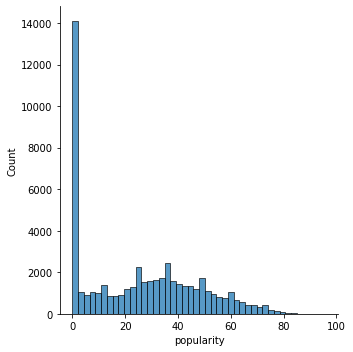

In [5]:
import seaborn as sns
sns.displot(data["popularity"])

For the sake of the exercise we will consider that all ratings under 20 are typos we will eliminate from the data

In [6]:
data = data[data["popularity"] >= 20]

### Save your results

Run the following cell to save your results.

In [7]:
from nbresult import ChallengeResult

ChallengeResult(
    "c5_data_cleaning",
    data=data).write()

## Baseline

**📝 We want to use a metric that measures the prediction error in the same unit than `popularity`. In addition, it should strongly penalize largest errors. Which sklearn's [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use? Store its exact name as string below**

In [8]:
scoring = "neg_mean_squared_error"

**📝 Let's build a baseline model using only the numerical features in our dataset.**
- Build `X_baseline` with only numerical features
- Build `y` your target containing the `popularity`
- Then 5 times cross validate the baseline linear model of your choice (do not fine tune it)
- Store your mean performance in a `float` variable named `baseline_score`

In [9]:
from pandas.api.types import is_numeric_dtype
for i in data.columns:
    if(is_numeric_dtype(data[i]) == True):
        print(i)

acousticness
danceability
duration_ms
energy
explicit
instrumentalness
key
liveness
loudness
mode
popularity
speechiness
tempo
valence


In [10]:
num_features = ["acousticness",
"danceability",
"duration_ms",
"energy",
"explicit",
"instrumentalness",
"key",
"liveness",
"loudness",
"mode",
"speechiness",
"tempo",
"valence"]

In [11]:
X_baseline = data[num_features]

In [12]:
X_baseline

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.65400,0.499,219827,0.190,0,0.004090,7,0.0898,-16.435,1,0.0454,149.460,0.4300
1,0.00592,0.439,483948,0.808,0,0.140000,2,0.0890,-8.497,1,0.0677,138.040,0.0587
2,0.73400,0.523,245693,0.288,0,0.000000,0,0.0771,-11.506,1,0.2140,75.869,0.4640
5,0.03050,0.366,229493,0.380,0,0.000003,0,0.0507,-16.440,1,0.0323,118.511,0.6530
7,0.13500,0.724,330707,0.458,0,0.000723,10,0.1660,-11.911,1,0.0329,111.180,0.8650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52307,0.12200,0.548,326893,0.673,0,0.001070,7,0.0492,-7.929,1,0.0265,105.390,0.7260
52310,0.00244,0.155,149040,0.650,0,0.746000,9,0.1490,-11.300,1,0.0478,203.351,0.6770
52312,0.16400,0.512,56253,0.907,0,0.004870,6,0.8010,-7.804,1,0.6620,85.615,0.3150
52313,0.77300,0.533,192838,0.659,0,0.773000,2,0.1130,-9.117,0,0.0426,158.366,0.6140


In [13]:
y = data["popularity"]
y

0        40
1        22
2        40
5        22
7        30
         ..
52307    37
52310    34
52312    25
52313    43
52316    40
Name: popularity, Length: 30240, dtype: int64

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
scores = cross_validate(reg, X_baseline, y, cv=5, scoring=('neg_mean_squared_error'))

In [15]:
scores

{'fit_time': array([0.01501298, 0.01400018, 0.0123353 , 0.00866437, 0.00861549]),
 'score_time': array([0.00211763, 0.00494099, 0.00248718, 0.00245118, 0.00260305]),
 'test_score': array([-163.61916291, -160.85572824, -162.98675445, -167.09527057,
        -163.82308733])}

In [16]:
baseline_score =scores["test_score"].mean()

In [17]:
baseline_score

-163.67600069997474

### Save your results

Run the following cell to save your results.

In [18]:
from nbresult import ChallengeResult

ChallengeResult(
    "baseline",
    scoring=scoring,
    baseline_score=baseline_score).write()

## Feature engineering

Let's now use the features that we left aside: `release_date` and `artist` to improve the performance of our model. We'll create them manually in a train vs. test context first (and pipeline them later)

### holdout
**📝 Create the 4 variables `X_train` `y_train`, `X_test`, `y_test` with a 50% split with random sampling**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.5)

### year

**📝 Create `X_train_year` and `X_test_year` by adding the new column `year` containing the release year of the track as integer**

In [20]:
X_train_year = X_train
X_test_year = X_test

In [21]:
X_year = data[["release_date"]]

In [22]:
X_year

,release_date
0,1971
1,2015-02-02
2,1968-09-01
5,1986-01-01
7,1978-07-14
...,...
52307,1980-10-17
52310,1990-08-13
52312,1977-01-01
52313,1965-06-01


In [23]:
X_train_year = X_train_year.merge(X_year,left_index=True, right_index=True)

In [24]:
X_train_year


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,release_date
3061,0.3270,0.768,174287,0.7900,0,0.000000,4,0.1400,-6.295,1,0.0491,153.363,0.9630,1989-11-25
17497,0.0110,0.736,218453,0.8630,0,0.112000,7,0.3280,-7.944,1,0.0320,141.033,0.7410,1999
13236,0.1210,0.524,314450,0.2500,0,0.863000,9,0.2670,-20.571,1,0.0330,103.568,0.0399,1987-03-03
43490,0.9900,0.265,95307,0.0838,0,0.848000,10,0.1010,-23.470,1,0.0349,135.873,0.2390,2005-01-01
7193,0.2640,0.831,177145,0.7820,0,0.000000,10,0.0407,-5.160,1,0.0457,111.182,0.9310,1990-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,0.9610,0.347,140827,0.2060,0,0.000002,6,0.0852,-13.212,1,0.0376,133.169,0.4120,1974-01-01
33514,0.0217,0.731,352171,0.8760,1,0.000000,10,0.0813,-5.053,0,0.2980,94.155,0.6790,1992-12-10
41948,0.8300,0.701,270360,0.6500,0,0.000000,0,0.8080,-8.801,1,0.5580,85.750,0.8510,1979
52094,0.2420,0.740,180161,0.4150,1,0.000156,0,0.3190,-8.914,1,0.0707,136.029,0.1560,2019-06-21


In [25]:
X_test_year = X_test_year.merge(X_year,left_index=True, right_index=True)

In [26]:
X_test_year

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,release_date
38378,0.000239,0.457,317427,0.904,0,0.087900,2,0.3960,-5.303,1,0.0747,141.038,0.480,1980-07-25
8631,0.690000,0.676,215560,0.671,0,0.183000,2,0.1380,-7.636,1,0.0270,121.008,0.549,2007-09-25
14825,0.244000,0.645,163413,0.479,0,0.000078,5,0.0820,-13.283,1,0.1090,111.615,0.530,1978-05-01
22838,0.474000,0.621,283307,0.528,0,0.038700,0,0.1420,-12.376,1,0.0375,110.129,0.753,1973-01-01
6654,0.792000,0.567,162867,0.124,0,0.000000,0,0.1060,-16.446,1,0.0562,79.370,0.343,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28383,0.045700,0.287,279267,0.914,0,0.469000,3,0.3760,-6.056,1,0.0580,95.020,0.173,1994
45259,0.159000,0.715,267467,0.602,0,0.001360,9,0.1050,-12.148,0,0.0320,110.018,0.626,1987-10-20
2597,0.993000,0.236,149600,0.106,0,0.058500,7,0.0909,-26.927,0,0.0528,126.978,0.138,1998-10-30
50283,0.075500,0.679,214148,0.715,0,0.000000,9,0.2710,-6.383,1,0.0407,127.435,0.571,2013-01-01


In [27]:
X_train_year["release_date"]=pd.to_datetime(X_train_year["release_date"])

In [28]:
X_train_year["year"]=pd.DatetimeIndex(X_train_year["release_date"]).year

In [29]:
X_test_year["release_date"]=pd.to_datetime(X_test_year["release_date"])

In [30]:
X_test_year["year"]=pd.DatetimeIndex(X_test_year["release_date"]).year

In [31]:
X_train_year = X_train_year.drop(columns=['release_date'])
X_test_year = X_test_year.drop(columns=['release_date'])

### artist

How could we use the `artist` column? There are too many artists to one hot encode it.  
We could instead create an `artist_popularity` feature containing the mean popularity of an artist, computed as the mean popularity of all tracks the artist released _on the train set_.

#### Process artist popularity from the Training set

**📝 Compute and store the `artist_popularity` as a new pandas `Series`**  

In [32]:
artistbase = data[["artist","popularity"]]

In [33]:
datatrain = X_train_year.merge(artistbase,left_index=True, right_index=True)

In [34]:
datatrain

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist,popularity
3061,0.3270,0.768,174287,0.7900,0,0.000000,4,0.1400,-6.295,1,0.0491,153.363,0.9630,1989,Grupo Mandingo,32
17497,0.0110,0.736,218453,0.8630,0,0.112000,7,0.3280,-7.944,1,0.0320,141.033,0.7410,1999,Captain Jack,43
13236,0.1210,0.524,314450,0.2500,0,0.863000,9,0.2670,-20.571,1,0.0330,103.568,0.0399,1987,U2,41
43490,0.9900,0.265,95307,0.0838,0,0.848000,10,0.1010,-23.470,1,0.0349,135.873,0.2390,2005,English Chamber Orchestra,46
7193,0.2640,0.831,177145,0.7820,0,0.000000,10,0.0407,-5.160,1,0.0457,111.182,0.9310,1990,Joan Sebastian,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,0.9610,0.347,140827,0.2060,0,0.000002,6,0.0852,-13.212,1,0.0376,133.169,0.4120,1974,Giuseppe Verdi,25
33514,0.0217,0.731,352171,0.8760,1,0.000000,10,0.0813,-5.053,0,0.2980,94.155,0.6790,1992,Eazy-E,39
41948,0.8300,0.701,270360,0.6500,0,0.000000,0,0.8080,-8.801,1,0.5580,85.750,0.8510,1979,Stan Rogers,51
52094,0.2420,0.740,180161,0.4150,1,0.000156,0,0.3190,-8.914,1,0.0707,136.029,0.1560,2019,Bea Miller,80


In [35]:
artpoptrain = pd.Series(datatrain.groupby('artist')['popularity'].mean())

In [36]:
artpopglobal = pd.Series(data.groupby('artist')['popularity'].mean())

In [37]:
artist_popularity = artpoptrain

In [38]:
artpopdf = pd.DataFrame(artpoptrain)

In [39]:
artpopdf

,popularity
artist,
"""Weird Al"" Yankovic",36.000000
$NOT,72.000000
'Til Tuesday,27.000000
*NSYNC,46.666667
...And You Will Know Us by the Trail of Dead,36.000000
...,...
鈴木 弘,35.000000
須田景凪,68.000000
高勝美,39.000000


In [40]:
datatemp = datatrain.drop(columns = ["popularity"])

In [41]:
dataengineered = datatemp.join(artpopdf, how = "left", on = "artist")

In [42]:
dataengineered = dataengineered.rename(columns={"popularity": "artist_popularity"})
dataengineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist,artist_popularity
3061,0.3270,0.768,174287,0.7900,0,0.000000,4,0.1400,-6.295,1,0.0491,153.363,0.9630,1989,Grupo Mandingo,30.000000
17497,0.0110,0.736,218453,0.8630,0,0.112000,7,0.3280,-7.944,1,0.0320,141.033,0.7410,1999,Captain Jack,43.000000
13236,0.1210,0.524,314450,0.2500,0,0.863000,9,0.2670,-20.571,1,0.0330,103.568,0.0399,1987,U2,39.815789
43490,0.9900,0.265,95307,0.0838,0,0.848000,10,0.1010,-23.470,1,0.0349,135.873,0.2390,2005,English Chamber Orchestra,46.000000
7193,0.2640,0.831,177145,0.7820,0,0.000000,10,0.0407,-5.160,1,0.0457,111.182,0.9310,1990,Joan Sebastian,46.736842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,0.9610,0.347,140827,0.2060,0,0.000002,6,0.0852,-13.212,1,0.0376,133.169,0.4120,1974,Giuseppe Verdi,28.000000
33514,0.0217,0.731,352171,0.8760,1,0.000000,10,0.0813,-5.053,0,0.2980,94.155,0.6790,1992,Eazy-E,37.500000
41948,0.8300,0.701,270360,0.6500,0,0.000000,0,0.8080,-8.801,1,0.5580,85.750,0.8510,1979,Stan Rogers,51.000000
52094,0.2420,0.740,180161,0.4150,1,0.000156,0,0.3190,-8.914,1,0.0707,136.029,0.1560,2019,Bea Miller,80.000000


In [43]:
artist_popularity_df = dataengineered[["artist_popularity"]]
artist_popularity_df = artist_popularity_df.set_index(dataengineered.index)
artist_popularity_df

,artist_popularity
3061,30.000000
17497,43.000000
13236,39.815789
43490,46.000000
7193,46.736842
...,...
20244,28.000000
33514,37.500000
41948,51.000000
52094,80.000000


#### Apply the artist popularity to `X_train_year`

**📝 Create a new DataFrame `X_train_engineered` which adds a new column to the existing `X_train_year` with the `artist_popularity` corresponding to the song's artist.** 

🚨 Make sure that the target `popularity` does not end up in `X_train_engineered` 

In [44]:
X_train_engineered = X_train_year.merge(artist_popularity_df,left_index=True, right_index=True)

In [45]:
X_train_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist_popularity
3061,0.3270,0.768,174287,0.7900,0,0.000000,4,0.1400,-6.295,1,0.0491,153.363,0.9630,1989,30.000000
17497,0.0110,0.736,218453,0.8630,0,0.112000,7,0.3280,-7.944,1,0.0320,141.033,0.7410,1999,43.000000
13236,0.1210,0.524,314450,0.2500,0,0.863000,9,0.2670,-20.571,1,0.0330,103.568,0.0399,1987,39.815789
43490,0.9900,0.265,95307,0.0838,0,0.848000,10,0.1010,-23.470,1,0.0349,135.873,0.2390,2005,46.000000
7193,0.2640,0.831,177145,0.7820,0,0.000000,10,0.0407,-5.160,1,0.0457,111.182,0.9310,1990,46.736842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,0.9610,0.347,140827,0.2060,0,0.000002,6,0.0852,-13.212,1,0.0376,133.169,0.4120,1974,28.000000
33514,0.0217,0.731,352171,0.8760,1,0.000000,10,0.0813,-5.053,0,0.2980,94.155,0.6790,1992,37.500000
41948,0.8300,0.701,270360,0.6500,0,0.000000,0,0.8080,-8.801,1,0.5580,85.750,0.8510,1979,51.000000
52094,0.2420,0.740,180161,0.4150,1,0.000156,0,0.3190,-8.914,1,0.0707,136.029,0.1560,2019,80.000000


#### Apply the artist popularity to `X_test_year`

**📝 Similarily, create a new DataFrame `X_test_engineered` which also adds a new column to the existing `X_test_year` with the `artist_popularity` corresponding to the song's artist, computed from the training set.**

🚨**If an artist has never been seen in the training set, use the global mean popularity of all the tracks of `X_train`**

In [46]:
gmp = dataengineered["artist_popularity"].mean()
gmp

41.63478835978836

In [47]:
dataengineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist,artist_popularity
3061,0.3270,0.768,174287,0.7900,0,0.000000,4,0.1400,-6.295,1,0.0491,153.363,0.9630,1989,Grupo Mandingo,30.000000
17497,0.0110,0.736,218453,0.8630,0,0.112000,7,0.3280,-7.944,1,0.0320,141.033,0.7410,1999,Captain Jack,43.000000
13236,0.1210,0.524,314450,0.2500,0,0.863000,9,0.2670,-20.571,1,0.0330,103.568,0.0399,1987,U2,39.815789
43490,0.9900,0.265,95307,0.0838,0,0.848000,10,0.1010,-23.470,1,0.0349,135.873,0.2390,2005,English Chamber Orchestra,46.000000
7193,0.2640,0.831,177145,0.7820,0,0.000000,10,0.0407,-5.160,1,0.0457,111.182,0.9310,1990,Joan Sebastian,46.736842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,0.9610,0.347,140827,0.2060,0,0.000002,6,0.0852,-13.212,1,0.0376,133.169,0.4120,1974,Giuseppe Verdi,28.000000
33514,0.0217,0.731,352171,0.8760,1,0.000000,10,0.0813,-5.053,0,0.2980,94.155,0.6790,1992,Eazy-E,37.500000
41948,0.8300,0.701,270360,0.6500,0,0.000000,0,0.8080,-8.801,1,0.5580,85.750,0.8510,1979,Stan Rogers,51.000000
52094,0.2420,0.740,180161,0.4150,1,0.000156,0,0.3190,-8.914,1,0.0707,136.029,0.1560,2019,Bea Miller,80.000000


In [48]:
trainartistlist = list(dataengineered.artist.unique())
trainartistlist

['Grupo Mandingo',
 'Captain Jack',
 'U2',
 'English Chamber Orchestra',
 'Joan Sebastian',
 'Fleetwood Mac',
 'Doris Day',
 'Grupo Miramar',
 'Bobby Cruz',
 'Boosie Badazz',
 'Whitesnake',
 'SALES',
 'Sonny & Cher',
 'LSD',
 'Yusef Lateef',
 'Paul Chambers',
 'Drake',
 'Big Tymers',
 'Madonna',
 'Brook Benton',
 'Louie Ramirez',
 'Bowling For Soup',
 'Keith Richards',
 'Metallica',
 'Rush',
 'Ronnie Milsap',
 'The Romantics',
 'Massive Attack',
 'Cross Canadian Ragweed',
 'Heart',
 'The Paul Butterfield Blues Band',
 'The Animals',
 '張洪量',
 'Saxon',
 'Dr. Dre',
 'Chris Brown',
 'Three Dog Night',
 'Evadne Baker',
 'Alice In Chains',
 'Ahmad Jamal',
 'Graham Bell',
 'Morphine',
 'Jim Croce',
 'A Tribe Called Quest',
 'Wolfgang Amadeus Mozart',
 'The Alan Parsons Project',
 'Pink Floyd',
 'The Cure',
 'Mariah Carey',
 'Taylor Swift',
 'Keith Anderson',
 'Gang Starr',
 'Pete Townshend',
 'Hank Williams',
 'The Notorious B.I.G.',
 'Bob Dylan',
 'Cuco Sánchez',
 'Fra Lippo Lippi',
 'Quiet 

In [49]:
X_test_engineered = X_test_year.merge(artistbase,left_index=True, right_index=True)
X_test_engineered = X_test_engineered.drop(columns = ["popularity"])

In [50]:
boolist = []
for i in X_test_engineered.index:
    if(X_test_engineered.loc[i]["artist"] in trainartistlist):
       boolist.append((i,True, artpopdf.loc[X_test_engineered.loc[i]["artist"]]["popularity"] ))
    else:
       boolist.append((i,False))
booldf = pd.DataFrame(boolist)
booldf[2] = booldf[2].fillna(gmp)
booldf = booldf.set_index(0)
booldf = booldf.drop(columns = 1)
booldf.columns = ["artist_popularity"]
booldf
        
        

,artist_popularity
0,
38378,47.500000
8631,41.634788
14825,36.697674
22838,26.857143
6654,32.615385
...,...
28383,41.634788
45259,41.634788
2597,29.400000


In [51]:
X_test_engineered = X_test_engineered.merge(booldf ,left_index = True, right_index = True)

In [52]:
X_test_engineered = X_test_engineered.drop(columns = ["artist"])
X_test_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist_popularity
38378,0.000239,0.457,317427,0.904,0,0.087900,2,0.3960,-5.303,1,0.0747,141.038,0.480,1980,47.500000
8631,0.690000,0.676,215560,0.671,0,0.183000,2,0.1380,-7.636,1,0.0270,121.008,0.549,2007,41.634788
14825,0.244000,0.645,163413,0.479,0,0.000078,5,0.0820,-13.283,1,0.1090,111.615,0.530,1978,36.697674
22838,0.474000,0.621,283307,0.528,0,0.038700,0,0.1420,-12.376,1,0.0375,110.129,0.753,1973,26.857143
6654,0.792000,0.567,162867,0.124,0,0.000000,0,0.1060,-16.446,1,0.0562,79.370,0.343,1960,32.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28383,0.045700,0.287,279267,0.914,0,0.469000,3,0.3760,-6.056,1,0.0580,95.020,0.173,1994,41.634788
45259,0.159000,0.715,267467,0.602,0,0.001360,9,0.1050,-12.148,0,0.0320,110.018,0.626,1987,41.634788
2597,0.993000,0.236,149600,0.106,0,0.058500,7,0.0909,-26.927,0,0.0528,126.978,0.138,1998,29.400000
50283,0.075500,0.679,214148,0.715,0,0.000000,9,0.2710,-6.383,1,0.0407,127.435,0.571,2013,41.634788


### Save your results

Run the following cell to save your results.

In [53]:
from nbresult import ChallengeResult

_ = pd.concat([X_train_engineered, X_test_engineered])

ChallengeResult("c7_feature_engineering",
    shape = _.shape,
    cols = _.columns,
    years = _.get("year"),
    popularities = _.get("artist_popularity"),
).write()

### Performance

**📝 Let's see how these features impact the performance of our model. Retrain the same baseline model on numerical values only, but adding the new features `year` and `artist_popularity`, and see how the performance is impacted. Save the performance in a `float` variable named `score_engineered`**

👉 Do not fine tune the model yet

In [57]:
reg = LinearRegression()
score = cross_validate(reg, X_train_engineered, y_train, cv=5, scoring=('neg_mean_squared_error'))
score_engineered = score["test_score"].mean()
score_engineered

-66.56000326211162

With a mean squared error of 66.56 we have improved our results (the previous mse was of 163)

### Save your results

Run the following cell to save your results.

In [58]:
from nbresult import ChallengeResult

ChallengeResult(
    "c7_score_engineering",
    scoring=scoring,
    score_engineered=score_engineered).write()

## Pipelining

**📝 Let's create a full sklearn preprocessing pipeline called `preproc`. It should integrate our feature engineering for `year` and `artist_popularity`, as well as any other preprocessing of your choice**

**Store also the number of columns/feature after preprocessing your inputs in a variable `col_number`**

**🚨⚠️ Advice: SKIP the `ArtistPopularityTransformer` if you don't have time to do it. It is better for you to have a working pipeline rather than NO pipeline at all**

In [59]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data.popularity
X = data.drop("popularity", axis=1)

In [60]:
# Run this cell to visualize your pipeline as you build it
from sklearn import set_config; set_config(display='diagram')

In [ ]:
# We give you below the skeleton of the custom ArtistPopularityTransformer to complete

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity

        # process mean popularity

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity

        # fills popularity of unknown artists with song global mean popularity

        return # TODO return X_copy

#### Save your results

Run the following cell to save your results.

In [ ]:
# Print below your preproc here for the correctors
from sklearn import set_config; set_config(display='diagram')
preproc

In [ ]:
from nbresult import ChallengeResult

ChallengeResult(
    "c6_preprocessing",
    col_number=col_number
).write()

## Training

📝 Time to optimize 

- **Add an estimator to your pipeline (only from scikit-learn)** 

- **Train your pipeline and fine-tune (optimize) your estimator to get the best prediction score**

- **You must create 2 pipelines (one with a linear model, one with an ensemble model)**

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe_linear = Pipeline(steps=[('regressor', LinearRegression())])
pipe_linear.fit(X_train_engineered, y_train)
cv_results = cross_validate(pipe_linear,X_test_engineered,y_test, cv=5 , scoring=('neg_mean_squared_error'))
score_linear = cv_results["test_score"].mean()
score_linear

-108.04780655739424

### Ensemble

In [67]:
from sklearn.ensemble import RandomForestRegressor

pipe_ensemble = Pipeline(steps=[('regressor', RandomForestRegressor())])
pipe_ensemble.fit(X_train_engineered, y_train)
cv_results = cross_validate(pipe_ensemble,X_test_engineered,y_test, cv=5 , scoring=('neg_mean_squared_error'))
score_ensemble = cv_results["test_score"].mean()
score_ensemble

-98.53174137758968

### Save your results

Run the following cell to save your results.

In [68]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_ensemble

Pipeline(steps=[('regressor', RandomForestRegressor())])

In [69]:
# Print below your best pipe for correction purpose
pipe_ensemble

Pipeline(steps=[('regressor', RandomForestRegressor())])

In [70]:
from nbresult import ChallengeResult

ChallengeResult("c8_c9_c11_c13_model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**